In [1]:
import os
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
from matplotlib import pylab as plt

import optuna

In [2]:
token = os.environ['oanda_access_token']
account = os.environ['oanda_account_id']

In [3]:
from my_oanda.my_oanda import Bot

In [4]:
class MyBot(Bot):
    def set_param(self, a, b, c, d, stop_loss, take_profit):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.stop_loss = stop_loss
        self.take_profit = take_profit
        
    def atr(self, *, period: int = 14, price: str = "C"):
        a = (self.df.H - self.df.L).abs()
        b = (self.df.H - self.df[price].shift()).abs()
        c = (self.df.L - self.df[price].shift()).abs()

        df = pd.concat([a, b, c], axis=1).max(axis=1)
        return df.ewm(span=period).mean()
        
    def strategy(self):
        rsi = self.rsi(period=self.a)
        ema = self.ema(period=self.b)
        atr = self.atr(period=self.c)
        lower = ema - atr
        upper = ema + atr
        self.buy_entry = (rsi < self.d )& (self.df.C < lower)
        self.sell_entry = (rsi > 100-self.d) & (self.df.C > upper)
        self.sell_exit = ema > self.df.C
        self.buy_exit = ema < self.df.C


In [5]:
start = "2020-1-1"
end = "2020-12-31"
glan = "M1"
inst = "USD_JPY"

In [6]:
mybot = MyBot(
    account_id=account,
    access_token=token,
    environment='live',
    instrument=inst,
    granularity=glan, # 15 second candlestick,
    folder = "../data/"
)

In [7]:
def objective(trial):
    a = trial.suggest_int('a', 5, 50)
    b = trial.suggest_int('b', 5, 50)
    c = trial.suggest_int('c', 5, 50)
    d = trial.suggest_int('d', 20, 40)
    
    sl = trial.suggest_int('stop_loss', 5, 50)
    tp = trial.suggest_int('take_profit', 5, 50)
    
    mybot.set_param(a, b, c, d, sl, tp)
    
    score =  -mybot.backtest(from_date=start, to_date=end)['total profit']
#     print('a: %d, b: %d, score: %1.2f' % (a, b, -score))
    return score

In [8]:
study = optuna.create_study()
study.optimize(objective, n_trials=1000)

[I 2021-02-20 23:17:06,806] A new study created in memory with name: no-name-d4014cac-8e70-471f-ada4-0166169b11d3
[I 2021-02-20 23:20:34,350] Trial 0 finished with value: -146830.0 and parameters: {'a': 36, 'b': 13, 'c': 30, 'd': 37, 'stop_loss': 14, 'take_profit': 35}. Best is trial 0 with value: -146830.0.
[I 2021-02-20 23:20:39,476] Trial 1 finished with value: -15120.0 and parameters: {'a': 43, 'b': 27, 'c': 31, 'd': 31, 'stop_loss': 47, 'take_profit': 26}. Best is trial 0 with value: -146830.0.
[I 2021-02-20 23:20:44,227] Trial 2 finished with value: -4150.0 and parameters: {'a': 45, 'b': 24, 'c': 42, 'd': 20, 'stop_loss': 14, 'take_profit': 26}. Best is trial 0 with value: -146830.0.
[I 2021-02-20 23:20:48,939] Trial 3 finished with value: -64200.0 and parameters: {'a': 41, 'b': 37, 'c': 43, 'd': 29, 'stop_loss': 5, 'take_profit': 39}. Best is trial 0 with value: -146830.0.
[I 2021-02-20 23:20:54,539] Trial 4 finished with value: -126310.0 and parameters: {'a': 31, 'b': 36, 'c': 

[I 2021-02-20 23:24:04,644] Trial 39 finished with value: -30090.0 and parameters: {'a': 27, 'b': 41, 'c': 33, 'd': 23, 'stop_loss': 41, 'take_profit': 8}. Best is trial 12 with value: -268730.0.
[I 2021-02-20 23:24:10,046] Trial 40 finished with value: -147470.0 and parameters: {'a': 24, 'b': 36, 'c': 15, 'd': 32, 'stop_loss': 22, 'take_profit': 47}. Best is trial 12 with value: -268730.0.
[I 2021-02-20 23:24:16,278] Trial 41 finished with value: -233360.0 and parameters: {'a': 14, 'b': 32, 'c': 10, 'd': 30, 'stop_loss': 20, 'take_profit': 12}. Best is trial 12 with value: -268730.0.
[I 2021-02-20 23:24:21,966] Trial 42 finished with value: -302580.0 and parameters: {'a': 16, 'b': 29, 'c': 7, 'd': 30, 'stop_loss': 11, 'take_profit': 13}. Best is trial 42 with value: -302580.0.
[I 2021-02-20 23:24:27,453] Trial 43 finished with value: -258700.0 and parameters: {'a': 17, 'b': 27, 'c': 5, 'd': 28, 'stop_loss': 10, 'take_profit': 8}. Best is trial 42 with value: -302580.0.
[I 2021-02-20 2

[I 2021-02-20 23:28:08,963] Trial 79 finished with value: -369420.0 and parameters: {'a': 6, 'b': 17, 'c': 40, 'd': 35, 'stop_loss': 7, 'take_profit': 17}. Best is trial 64 with value: -426840.0.
[I 2021-02-20 23:28:15,424] Trial 80 finished with value: -363900.0 and parameters: {'a': 6, 'b': 17, 'c': 46, 'd': 35, 'stop_loss': 7, 'take_profit': 15}. Best is trial 64 with value: -426840.0.
[I 2021-02-20 23:28:22,091] Trial 81 finished with value: -360470.0 and parameters: {'a': 6, 'b': 17, 'c': 44, 'd': 39, 'stop_loss': 7, 'take_profit': 16}. Best is trial 64 with value: -426840.0.
[I 2021-02-20 23:28:28,380] Trial 82 finished with value: -368690.0 and parameters: {'a': 6, 'b': 14, 'c': 48, 'd': 35, 'stop_loss': 9, 'take_profit': 20}. Best is trial 64 with value: -426840.0.
[I 2021-02-20 23:28:34,808] Trial 83 finished with value: -324940.0 and parameters: {'a': 9, 'b': 13, 'c': 40, 'd': 35, 'stop_loss': 9, 'take_profit': 21}. Best is trial 64 with value: -426840.0.
[I 2021-02-20 23:28:

KeyboardInterrupt: 

In [9]:
params=study.best_trial.params

In [10]:
params

{'a': 5, 'b': 13, 'c': 34, 'd': 36, 'stop_loss': 6, 'take_profit': 16}

In [11]:
mybot.set_param(params['a'], params['b'], params['c'], params['d'], params['stop_loss'], params['take_profit'])

total profit        427290.000
total trades         28692.000
win rate                64.809
profit factor            1.112
maximum drawdown     33720.000
recovery factor         12.672
riskreward ratio         0.597
sharpe ratio             0.039
average return          13.817
stop loss             5476.000
take profit            184.000
dtype: float64


total profit        427290.000
total trades         28692.000
win rate                64.809
profit factor            1.112
maximum drawdown     33720.000
recovery factor         12.672
riskreward ratio         0.597
sharpe ratio             0.039
average return          13.817
stop loss             5476.000
take profit            184.000
dtype: float64

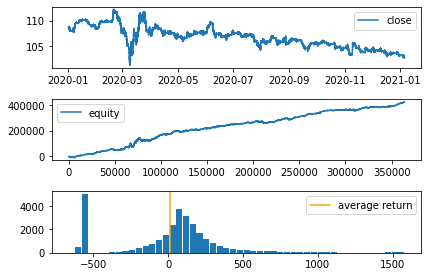

In [12]:
mybot.backtest(from_date=start, to_date=end, filename="hogebacktest.png", show=True)

total profit        66550.000
total trades         3569.000
win rate               68.282
profit factor           1.231
maximum drawdown     4950.000
recovery factor        13.444
riskreward ratio        0.536
sharpe ratio            0.075
average return         17.858
stop loss             344.000
take profit             0.000
dtype: float64


total profit        66550.000
total trades         3569.000
win rate               68.282
profit factor           1.231
maximum drawdown     4950.000
recovery factor        13.444
riskreward ratio        0.536
sharpe ratio            0.075
average return         17.858
stop loss             344.000
take profit             0.000
dtype: float64

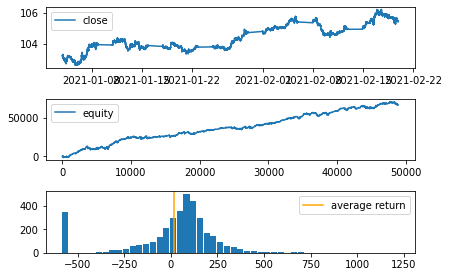

In [13]:
start_rev = "2021-1-1"
end_rev = "2021-2-19"
mybot.backtest(from_date=start_rev, to_date=end_rev, filename="hogebacktest.png", show=True)

In [ ]:
#total profit        14490.000